In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from itertools import cycle

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA, KernelPCA

In [5]:
DIR = Path('Tea Score Images - partition').resolve()
DATA_DIR = DIR / 'Feature data' / 'GLCM Feature Data'
CLASS_LABEL = ['Score 1', 'Score 2', 'Score 3', 'Score 4']

In [6]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
maxabs_scaler = MaxAbsScaler()
robust_scaler = RobustScaler()

encoder = LabelEncoder()

In [7]:
data_frames = []

for label in CLASS_LABEL:
    data_dir = DATA_DIR / label
    
    for file in data_dir.glob('*.csv'):
        df = pd.read_csv(file)
        df['class label'] = label
        data_frames.append(df)

all_data_frames = pd.concat(data_frames, ignore_index=True)
glcm_feature = all_data_frames.drop(columns=['class label']).values
glcm_label = all_data_frames['class label'].values

print(glcm_feature.shape)
print(glcm_label.shape)

(160, 10)
(160,)


## Standard Scaler

In [8]:
standard_scaled_glcm = standard_scaler.fit_transform(glcm_feature)

pca = PCA(n_components=10)
principal_components = pca.fit_transform(standard_scaled_glcm)
standard_glcm_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 10):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 54.67%
explained variance PC2: 29.49%
explained variance PC3: 10.18%
explained variance PC4: 5.11%
explained variance PC5: 0.39%
explained variance PC6: 0.12%
explained variance PC7: 0.04%
explained variance PC8: 0.01%
explained variance PC9: 0.00%
explained variance PC10: 0.00%


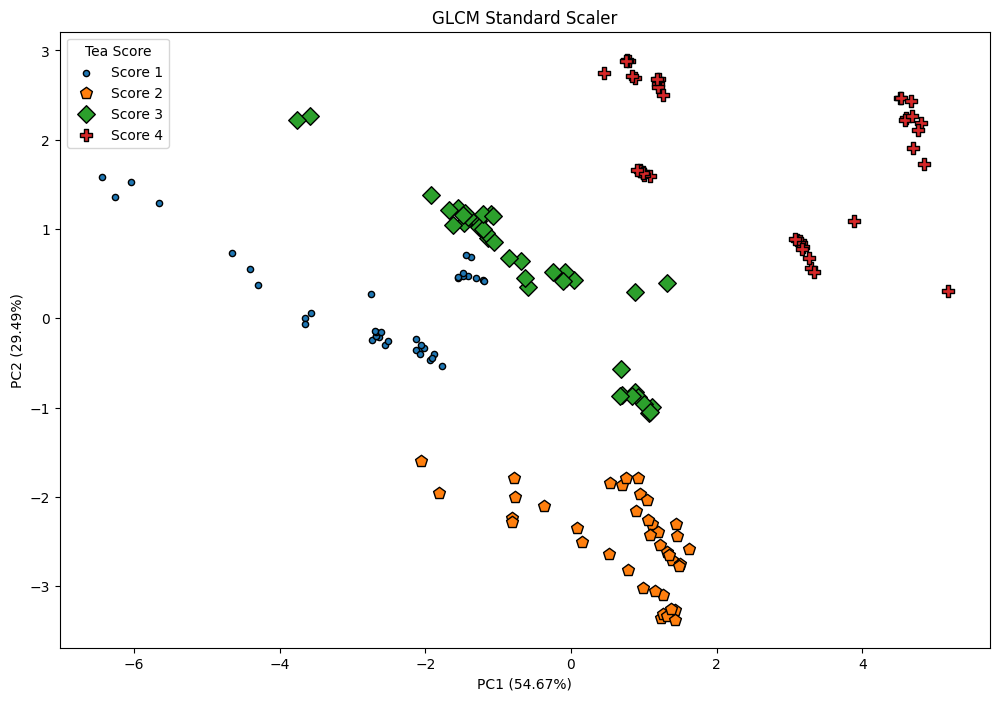

In [9]:
encoded_label = encoder.fit_transform(glcm_label)

standard_glcm_pca_df['encoded label'] = encoded_label
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = standard_glcm_pca_df[standard_glcm_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("GLCM Standard Scaler")
plt.legend(title='Tea Score')
plt.show()

## MinMax Scaler

In [10]:
minmax_scaled_glcm = minmax_scaler.fit_transform(glcm_feature)

pca = PCA(n_components=10)
principal_components = pca.fit_transform(minmax_scaled_glcm)
minmax_glcm_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 10):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 55.81%
explained variance PC2: 31.05%
explained variance PC3: 8.49%
explained variance PC4: 4.08%
explained variance PC5: 0.38%
explained variance PC6: 0.14%
explained variance PC7: 0.03%
explained variance PC8: 0.00%
explained variance PC9: 0.00%
explained variance PC10: 0.00%


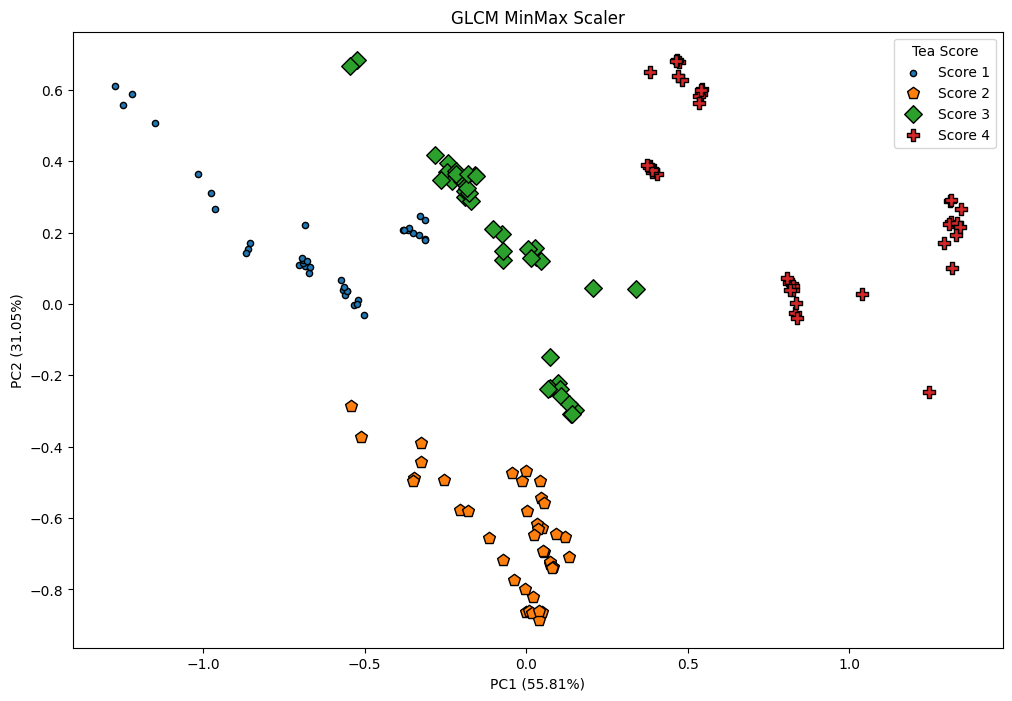

In [11]:
minmax_glcm_pca_df['encoded label'] = encoded_label
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = minmax_glcm_pca_df[minmax_glcm_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("GLCM MinMax Scaler")
plt.legend(title='Tea Score')
plt.show()

## MaxAbs Scaler

In [12]:
maxabs_scaled_glcm = maxabs_scaler.fit_transform(glcm_feature)

pca = PCA(n_components=10)
principal_components = pca.fit_transform(maxabs_scaled_glcm)
maxabs_glcm_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 10):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 85.23%
explained variance PC2: 12.17%
explained variance PC3: 1.95%
explained variance PC4: 0.40%
explained variance PC5: 0.16%
explained variance PC6: 0.08%
explained variance PC7: 0.00%
explained variance PC8: 0.00%
explained variance PC9: 0.00%
explained variance PC10: 0.00%


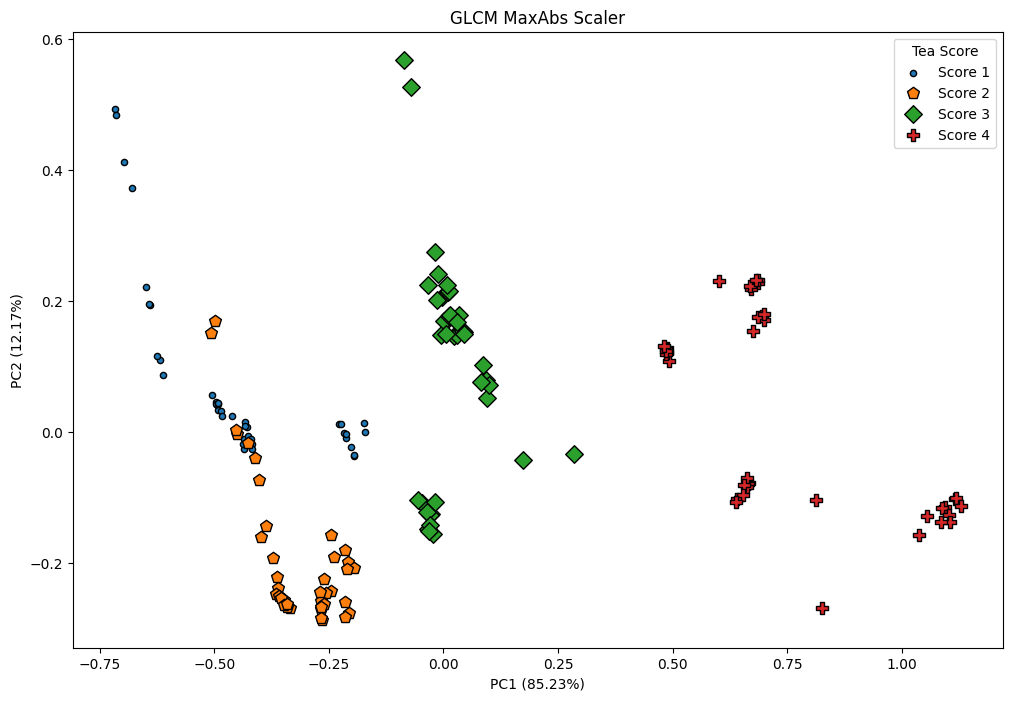

In [13]:
maxabs_glcm_pca_df['encoded label'] = encoded_label
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = maxabs_glcm_pca_df[maxabs_glcm_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("GLCM MaxAbs Scaler")
plt.legend(title='Tea Score')
plt.show()

## Robust Scaler

In [14]:
robust_scaled_glcm = robust_scaler.fit_transform(glcm_feature)

pca = PCA(n_components=10)
principal_components = pca.fit_transform(robust_scaled_glcm)
robust_glcm_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                                          'PC7', 'PC8', 'PC9', 'PC10'])
explained_variance = pca.explained_variance_ratio_
for i in range(0, 10):
    print(f'explained variance PC{i+1}: {explained_variance[i]*100:.2f}%')

explained variance PC1: 57.40%
explained variance PC2: 26.96%
explained variance PC3: 10.87%
explained variance PC4: 4.31%
explained variance PC5: 0.30%
explained variance PC6: 0.12%
explained variance PC7: 0.03%
explained variance PC8: 0.01%
explained variance PC9: 0.00%
explained variance PC10: 0.00%


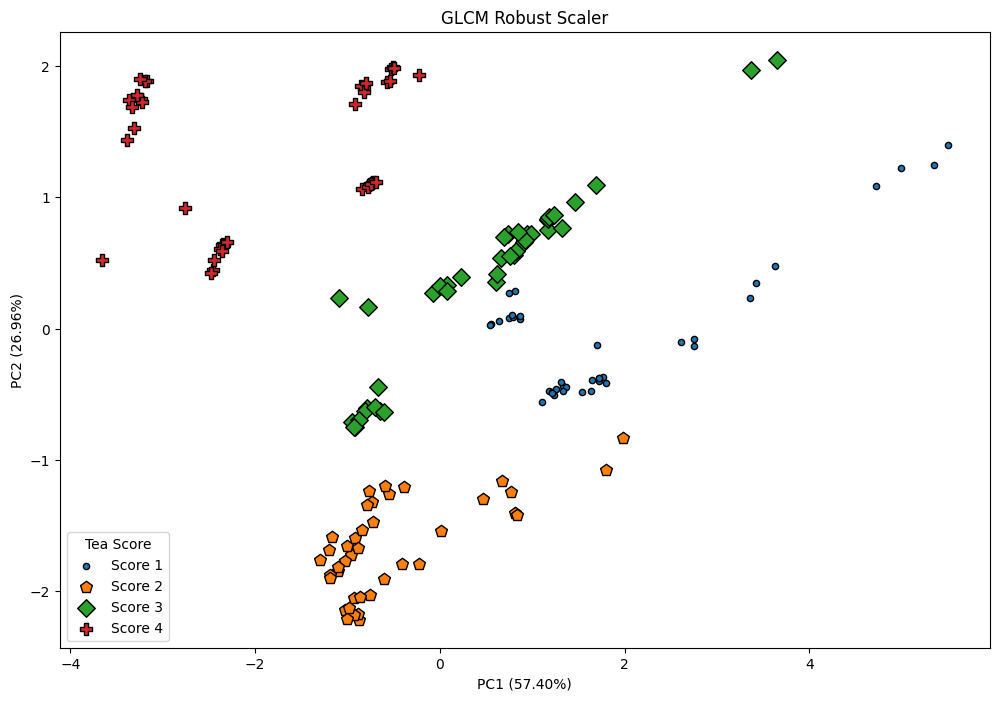

In [15]:
robust_glcm_pca_df['encoded label'] = encoded_label
unique_class = encoder.classes_

markers = ['.', 'p', 'D', 'P', 'X']
marker_cycle = cycle(markers)

plt.figure(figsize=(12,8))

for i, score in enumerate(unique_class):
  subset = robust_glcm_pca_df[robust_glcm_pca_df['encoded label'] == i]
  plt.scatter(subset['PC1'], subset['PC2'],
              label=score,
              marker=next(marker_cycle),
              edgecolors='k',
              s=80)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.2f}%)")
plt.title("GLCM Robust Scaler")
plt.legend(title='Tea Score')
plt.show()